In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('auto-mpg.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### Exploratory Data Analysis

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


#### Lets check the null values without using visualization

In [5]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

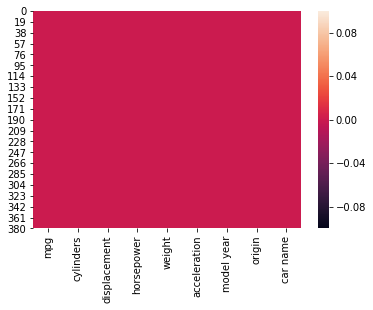

In [6]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [7]:
data = pd.DataFrame(data=data)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [8]:
data['car name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

#### Here all values of car name are unique and it will useful to predict the output so I am deleting this column 

In [9]:
data.drop(['car name'],axis=1,inplace=True)

In [10]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [11]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [12]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [13]:
data['horsepower'].mode()

0    150
dtype: object

In [14]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

#### Converting Object into Integer

In [15]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [16]:
array = data['horsepower']

array.shape

(398,)

In [17]:
le=LabelEncoder()
data1=le.fit_transform(data['horsepower'])
data1

array([15, 33, 27, 27, 22, 40, 45, 44, 46, 38, 35, 32, 27, 46, 89, 89, 91,
       79, 82, 48, 81, 84, 89,  8, 84, 44, 41, 43, 39, 82, 84, 89, 93,  0,
        3,  0, 82,  0, 33, 36, 29, 27, 37, 35, 36,  6, 67,  0, 82, 80, 84,
       65, 70, 60, 64, 55, 65, 89, 74, 53, 84, 80, 33, 36, 27, 29, 27, 42,
       30, 32, 38, 91, 27, 15, 22, 27,  7, 70, 81, 64, 80, 86, 91, 74, 82,
       36, 27, 24, 19, 27, 40, 27, 31, 27, 44, 46, 36,  3,  0,  0, 82, 89,
       48, 27, 34, 35, 37,  0, 82, 67, 88, 84, 79,  4, 84, 24, 47, 50, 69,
       85,  7, 27,  6, 12, 37, 89, 93,  0,  0, 62, 74, 60, 69,  0,  6,  3,
       22, 27, 27, 22, 27, 77, 62, 72, 51, 56, 69, 69, 69, 91, 87, 62, 89,
        3, 67, 67, 35, 24, 27, 25,  6,  3,  6, 89,  6,  6, 14, 69, 77,  0,
       72, 90, 66, 91, 91, 65, 84, 89, 82, 92,  9, 52, 80, 75, 86, 73, 77,
       22, 27, 11, 28,  0,  3, 75, 84, 51, 55, 65, 52,  0, 72,  6, 89, 66,
       65, 69, 67,  1, 27, 82,  5, 11, 37, 24, 15, 27, 63, 74, 54, 90, 65,
       24,  6, 24, 15,  6

In [18]:
data['horsepower']=data1

In [19]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

#### Replacing 0 with Median

In [20]:
data['horsepower'].replace(0,data['horsepower'].median(),inplace=True)

In [21]:
data['horsepower'].unique()

array([15, 33, 27, 22, 40, 45, 44, 46, 38, 35, 32, 89, 91, 79, 82, 48, 81,
       84,  8, 41, 43, 39, 93, 60,  3, 36, 29, 37,  6, 67, 80, 65, 70, 64,
       55, 74, 53, 42, 30,  7, 86, 24, 19, 31, 34, 88,  4, 47, 50, 69, 85,
       12, 62, 77, 72, 51, 56, 87, 25, 14, 90, 66, 92,  9, 52, 75, 73, 11,
       28,  1,  5, 63, 54, 26, 83, 58, 49, 61, 21,  2, 13, 17, 20, 18, 23,
       71, 57, 16, 78, 59, 68, 10, 76], dtype=int64)

#### Removing the Outliers

In [22]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(398, 8)
(396, 8)


#### Checking Skewness and Removing it

In [23]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower     -0.402872
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64

In [24]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [25]:
#Lets Again Check the Skewness
data.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.228886
horsepower     -0.402872
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.796540
dtype: float64

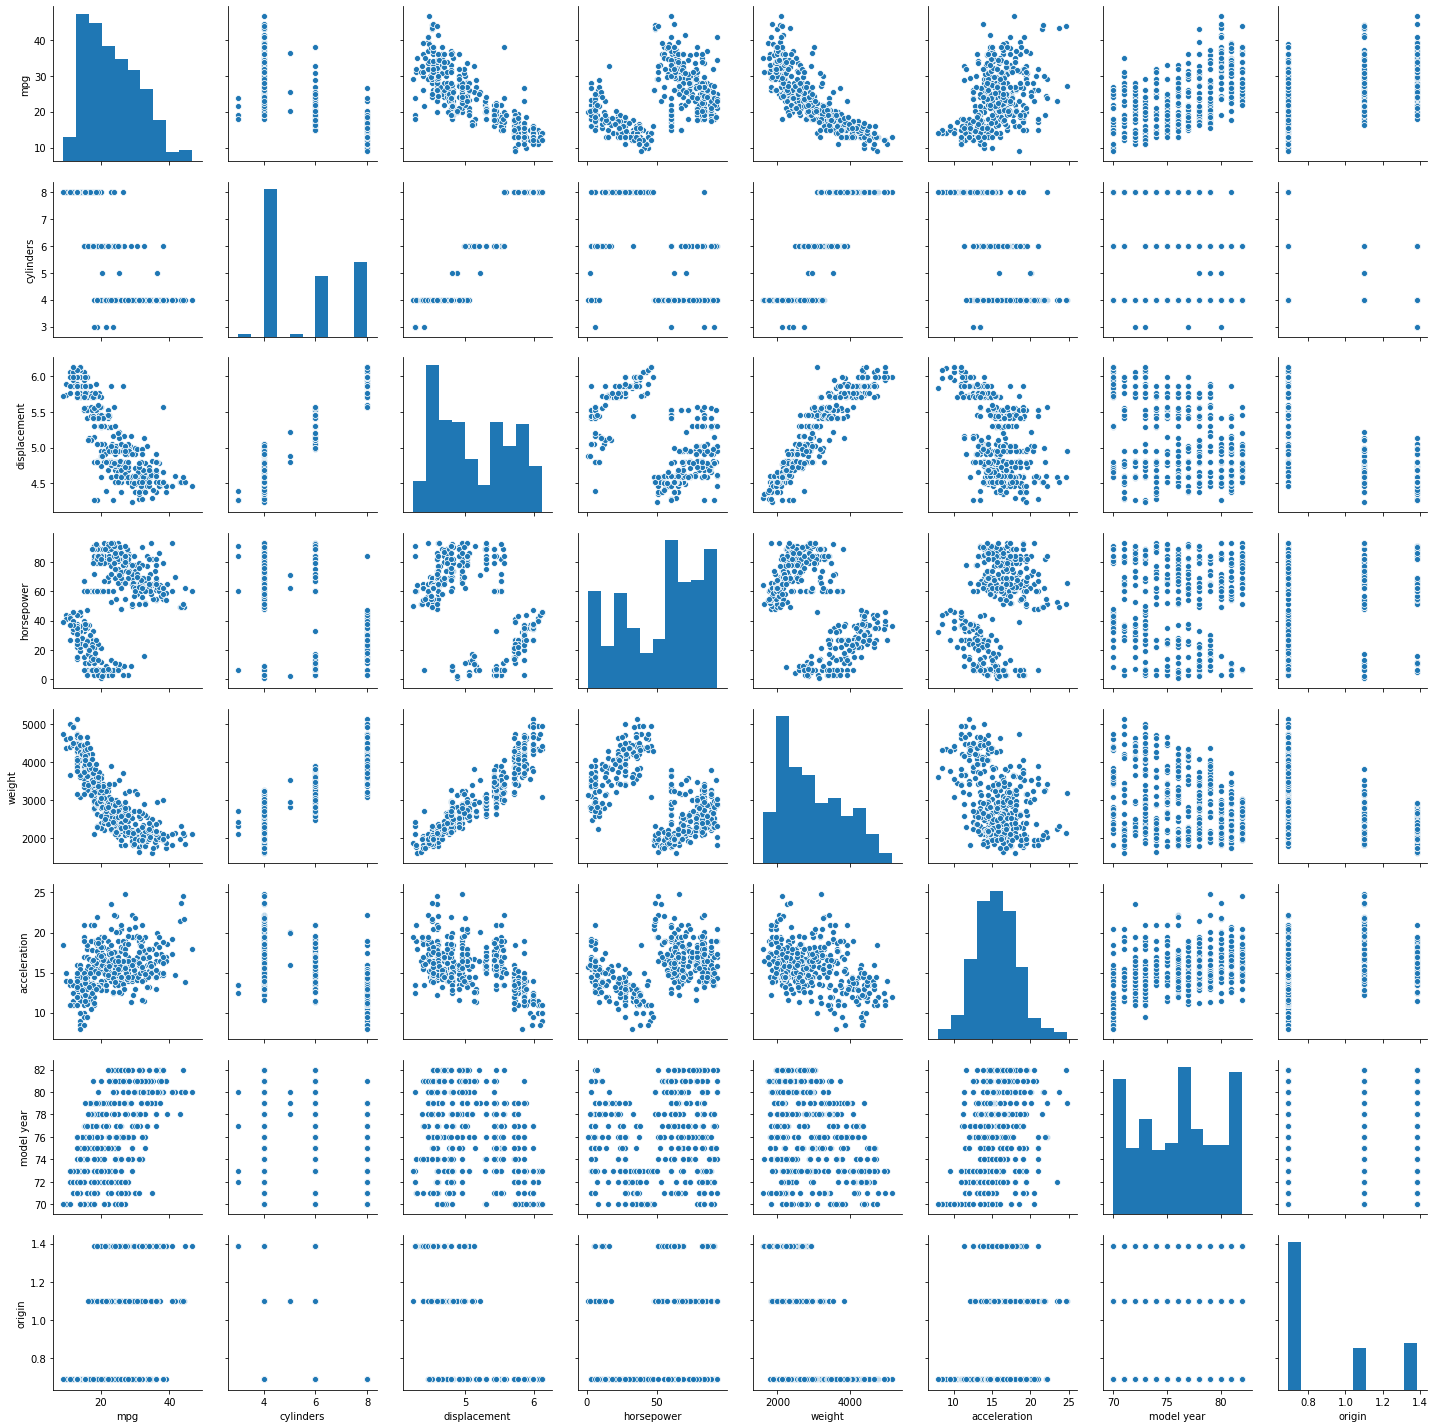

In [26]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

### Plotting Boxplot through Iteration

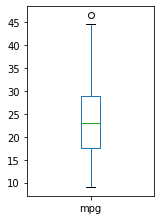

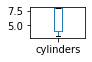

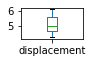

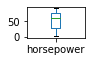

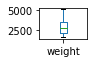

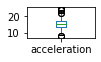

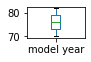

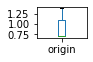

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

### Plotting Displot Through Iteration

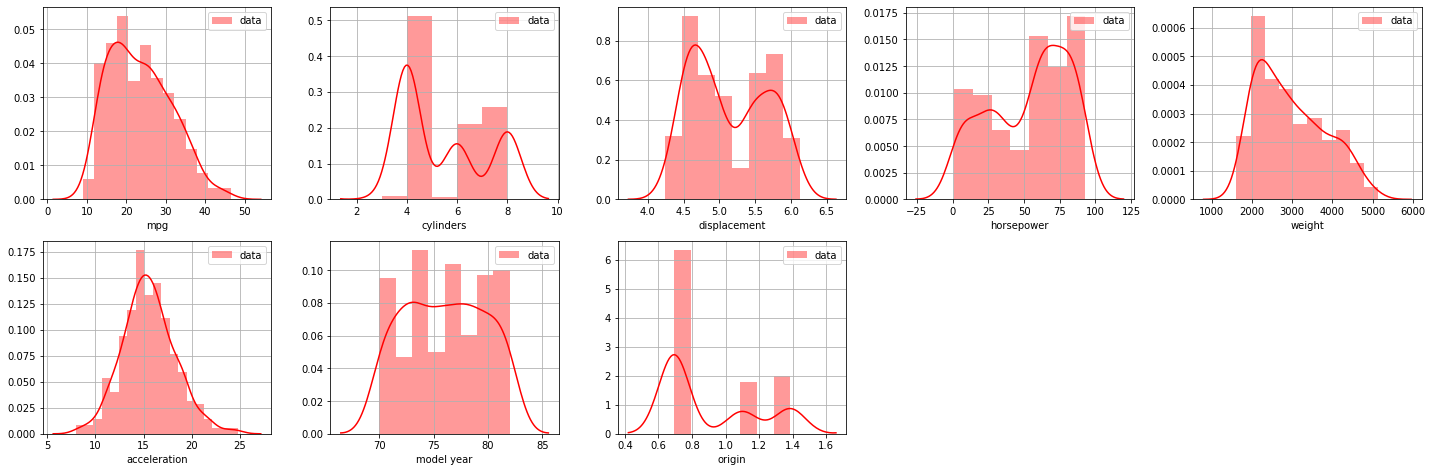

In [28]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

### LinePlot

In [29]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

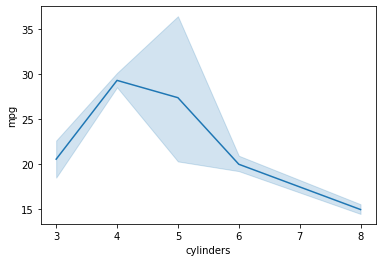

In [30]:
#Lets check the how cylinders is changing with respect to mpg
sns.lineplot(data["cylinders"],data["mpg"])
plt.show()

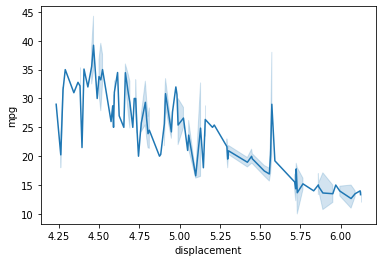

In [31]:
#Lets check the how displacement is changing with respect to mpg
sns.lineplot(data["displacement"],data["mpg"])
plt.show()

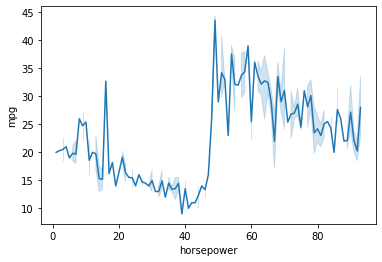

In [32]:
#Lets check the how horsepower is changing with respect to mpg
sns.lineplot(data["horsepower"],data["mpg"])
plt.show()

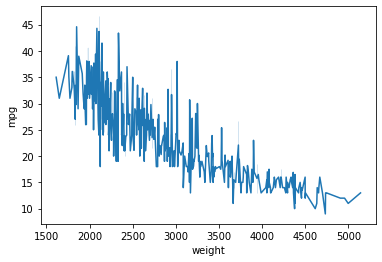

In [33]:
#Lets check the how weight is changing with respect to mpg
sns.lineplot(data["weight"],data["mpg"])
plt.show()

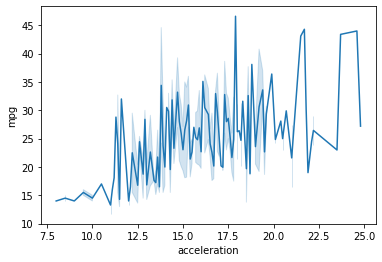

In [34]:
#Lets check the how acceleration is changing with respect to mpg
sns.lineplot(data["acceleration"],data["mpg"])
plt.show()

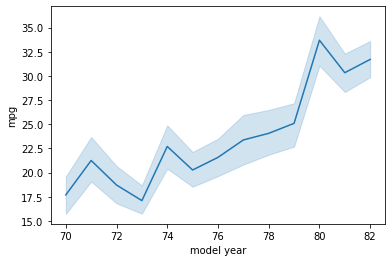

In [35]:
#Lets check the how model year is changing with respect to mpg
sns.lineplot(data["model year"],data["mpg"])
plt.show()

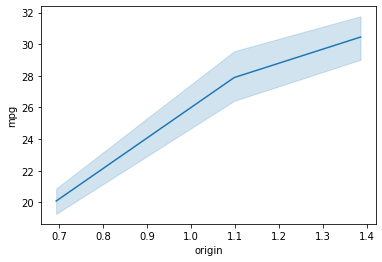

In [36]:
#Lets check the how origin is changing with respect to mpg
sns.lineplot(data["origin"],data["mpg"])
plt.show()

### Plotting Data using Scatter Plot

In [37]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

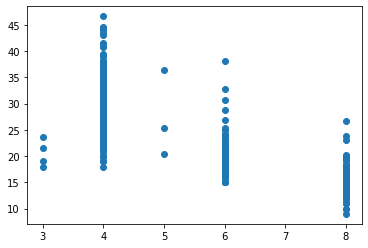

In [38]:
plt.scatter(data['cylinders'],data['mpg'])

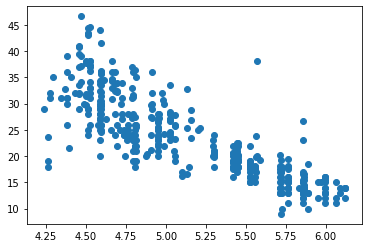

In [39]:
plt.scatter(data['displacement'],data['mpg'])

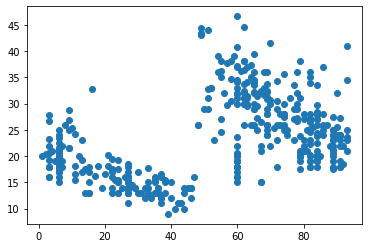

In [40]:
plt.scatter(data['horsepower'],data['mpg'])

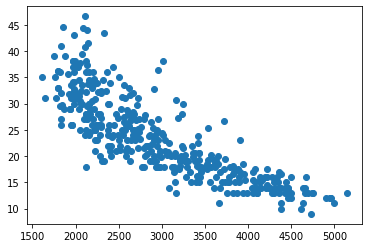

In [41]:
plt.scatter(data['weight'],data['mpg'])

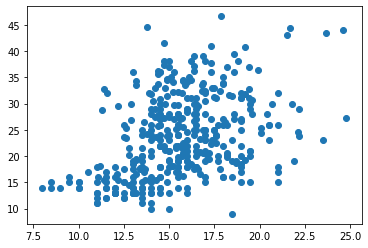

In [42]:
plt.scatter(data['acceleration'],data['mpg'])

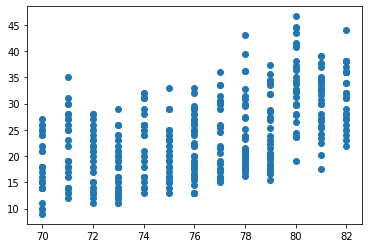

In [43]:
plt.scatter(data['model year'],data['mpg'])

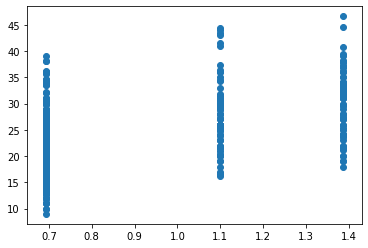

In [44]:
plt.scatter(data['origin'],data['mpg'])

### Column Plot

In [45]:
collist = data.columns.values
ncols=12
nrows=10

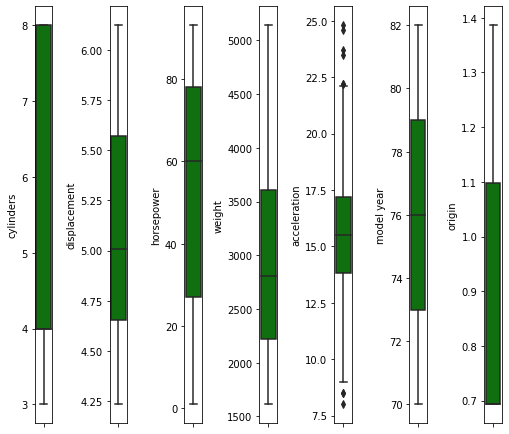

In [46]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### Separating X and Y Variable

In [47]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,5.730100,15,3504,12.0,70,0.693147
1,15.0,8,5.860786,33,3693,11.5,70,0.693147
2,18.0,8,5.765191,27,3436,11.0,70,0.693147
3,16.0,8,5.720312,27,3433,12.0,70,0.693147
4,17.0,8,5.713733,22,3449,10.5,70,0.693147
...,...,...,...,...,...,...,...,...
393,27.0,4,4.948760,80,2790,15.6,82,0.693147
394,44.0,4,4.584967,51,2130,24.6,82,1.098612
395,32.0,4,4.912655,78,2295,11.6,82,0.693147
396,28.0,4,4.795791,73,2625,18.6,82,0.693147


In [48]:
X = data.drop("mpg", axis=1)

In [49]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,5.730100,15,3504,12.0,70,0.693147
1,8,5.860786,33,3693,11.5,70,0.693147
2,8,5.765191,27,3436,11.0,70,0.693147
3,8,5.720312,27,3433,12.0,70,0.693147
4,8,5.713733,22,3449,10.5,70,0.693147
...,...,...,...,...,...,...,...
393,4,4.948760,80,2790,15.6,82,0.693147
394,4,4.584967,51,2130,24.6,82,1.098612
395,4,4.912655,78,2295,11.6,82,0.693147
396,4,4.795791,73,2625,18.6,82,0.693147


In [50]:
Y = data["mpg"]
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [51]:
X.shape

(398, 7)

In [52]:
Y.shape

(398,)

In [53]:
Y = Y.values.reshape(-1,1)

In [54]:
Y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17

In [55]:
Y.shape

(398, 1)

#### Applying Linear Regression

In [56]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.33,random_state=39)

In [57]:
train_X.shape

(266, 7)

In [58]:
train_Y.shape

(266, 1)

In [59]:
test_X.shape

(132, 7)

In [60]:
test_Y.shape

(132, 1)

In [61]:
lg = LinearRegression()

In [62]:
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
lg.coef_

array([[ 1.14999146e+00, -6.76878940e+00,  1.55785674e-02,
        -4.14394026e-03,  1.27504631e-01,  7.14007335e-01,
         2.21173703e+00]])

In [64]:
lg.intercept_

array([5.16830602])

In [65]:
lg.score(train_X,train_Y)

0.8242321340563146

In [67]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result price:",pred)
print("actual price",test_Y)

Predicted result price: [[29.98646489]
 [27.5172577 ]
 [20.51028948]
 [19.63170546]
 [26.19511621]
 [29.78104539]
 [25.33748408]
 [20.27206383]
 [22.72139533]
 [24.61279183]
 [20.48085882]
 [16.97165606]
 [22.4274763 ]
 [29.98624186]
 [32.55845799]
 [23.02907761]
 [ 8.95038657]
 [19.64673522]
 [ 8.18448486]
 [33.09664442]
 [21.63984927]
 [14.44303957]
 [16.16262173]
 [25.84351889]
 [27.55456375]
 [16.92590299]
 [34.10247478]
 [24.66505432]
 [19.59780231]
 [28.81741499]
 [30.56026645]
 [20.71607833]
 [35.5402427 ]
 [19.45405588]
 [26.90573354]
 [18.58567097]
 [24.30939804]
 [29.46876224]
 [24.02987743]
 [15.85756188]
 [15.14896563]
 [15.0777209 ]
 [26.81848655]
 [31.74400885]
 [24.67382131]
 [ 8.74666976]
 [28.11434982]
 [20.11675236]
 [15.36323489]
 [16.47128424]
 [14.88675473]
 [24.26289761]
 [28.13603379]
 [21.79676764]
 [30.68068311]
 [32.29551149]
 [31.31769346]
 [26.22518882]
 [24.47835717]
 [32.64336719]
 [19.23743183]
 [24.22620971]
 [ 8.26066749]
 [11.54762455]
 [28.3521918 ]
 

In [68]:
print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))

error:
Mean absolute error: 2.3446511625762705
Mean sqaured error: 10.17181906039725
Root mean squared error: 3.189328935747652


#### Boost through GradientBoostRegressor By using Parameters

In [69]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.9778626675525456
Mean squared error: 8.90
R2 Score: 0.84


#### Lets Visualize the Goodness of the Prediction

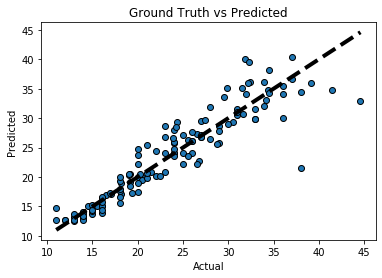

In [71]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Linear Regression using Recursion

In [72]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [73]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [74]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.8414095282168923
r2 score corresponding to  43 is 0.8349497545956076
r2 score corresponding to  44 is 0.8439371851668719
r2 score corresponding to  45 is 0.8293332288415086
r2 score corresponding to  46 is 0.8429869448055789
r2 score corresponding to  47 is 0.8239473746592735
r2 score corresponding to  48 is 0.8037892926746681
r2 score corresponding to  49 is 0.8539969087675833
r2 score corresponding to  50 is 0.8201895449591246
r2 score corresponding to  51 is 0.8122140911119158
r2 score corresponding to  52 is 0.7850577755686489
r2 score corresponding to  53 is 0.809254555888557
r2 score corresponding to  54 is 0.7491443486168234
r2 score corresponding to  55 is 0.8578722154579841
r2 score corresponding to  56 is 0.8375597651357085
r2 score corresponding to  57 is 0.784084888811931
r2 score corresponding to  58 is 0.8577495064982088
r2 score corresponding to  59 is 0.7942230087707365
r2 score corresponding to  60 is 0.8225563615249624
r2 score corre

### KNN Model

In [75]:
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, predicted))

Mean squared error of linear svc: 15.68
R2 Score of linear svc: 0.77


### Lets use grid_search to find optimal value of n_neighbors for KNN Model

In [76]:
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 7}

In [77]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=7)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.7864795131647895
r2 score corresponding to  43 is 0.6328651094618545
r2 score corresponding to  44 is 0.723860642595244
r2 score corresponding to  45 is 0.6088579858193333
r2 score corresponding to  46 is 0.6726158343994366
r2 score corresponding to  47 is 0.5742156149479105
r2 score corresponding to  48 is 0.7857712766278409
r2 score corresponding to  49 is 0.7433116414390755
r2 score corresponding to  50 is 0.7215503123413713
r2 score corresponding to  51 is 0.7081357791048302
r2 score corresponding to  52 is 0.6068484332688813
r2 score corresponding to  53 is 0.6985222148094006
r2 score corresponding to  54 is 0.5560586282464051
r2 score corresponding to  55 is 0.7892053276616379
r2 score corresponding to  56 is 0.7342419835855059
r2 score corresponding to  57 is 0.686221936427841
r2 score corresponding to  58 is 0.7528645385949413
r2 score corresponding to  59 is 0.7529690801333475
r2 score corresponding to  60 is 0.6448815452950114
r2 score corre

In [78]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.5910672561444195
Standard deviation in r2 scorefor Linear Regression: 0.22559742973432106

Mean r2 score for KNN Regression:  0.34592865022997493
Stadard deviation in r2 score for KNN Regression: 0.547235785613778


### Boosting Linear Regression

In [79]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6996858497983431
Standard deviation in r2 score for ada boosting Regression:  0.20902598288450194


### Boosting KNN model

In [80]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.694788558213379
Standard deviation in r2 score for ada boosting Regression:  0.20507446647189115


#### Lets check lasso regression and best value of alpha

In [81]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.01}

In [82]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.01)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.5938683707003317
Standard deviation in r2 score for Lasso Regression:  0.22311101911473732


### Boosting Lasso Regressor

In [83]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.7019873018782249
Standard deviation in r2 score for ada boosting Regression:  0.1825519725630153


### Support Vector Regression

In [84]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "linear")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 9.88
R2 Score of linear svc: 0.85


### Boosting Support Vector Machine

In [85]:
from sklearn.ensemble import AdaBoostRegressor

In [86]:
ada_reg4=AdaBoostRegressor()
add_reg4=AdaBoostRegressor(base_estimator=svr1,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6989847604328083
Standard deviation in r2 score for ada boosting Regression:  0.20261823874181445


### Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 0)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y_pred4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


### Decision Tree Regressor Using GridSearchCV

In [88]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,Y)
print("R-Squared on train dataset={}".format(dtm.score(test_X,test_Y)))

dtm.fit(test_X,test_Y)   
print("R-Squaredon test dataset={}".format(dtm.score(test_X,test_Y)))

R-Squared on train dataset=0.8761961999139452
R-Squaredon test dataset=0.9404015326346873


In [89]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=4,
                                             max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                      

In [90]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.5936120629452445
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


### Boosting Decision Tree

In [91]:
from sklearn.ensemble import AdaBoostRegressor

In [92]:
ada_reg5=AdaBoostRegressor()
add_reg5=AdaBoostRegressor(base_estimator=dtm,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6195439396011209
Standard deviation in r2 score for ada boosting Regression:  0.28869845199197297


### Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_pred5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred5))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred5))

Mean squared error of poly svc: 10.71
R2 Score : 0.84


#### Random Forest Regressor with GridSearchCV

In [94]:
rf_gs = RandomForestRegressor(n_estimators=100)

In [95]:
n_features = X.shape[1]

In [96]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 1, 'max_depth': 17}


In [97]:
rf_gss = RandomForestRegressor(max_features = 1, max_depth = 17)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6677449989511588
Standard deviation in r2 score for ada boosting Regression:  0.2766978937354141


#### Boosting RandomForestRegressor

In [98]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.7572999851385279
Standard deviation in r2 score for ada boosting Regression:  0.19586617421268324


#### NOTE::All models,dtregressor gives the Highest r2 score(1) and mean squared error is zero so we are going to save this model

In [99]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(dtregressor,'Auto mpg.pkl')

['Auto mpg.pkl']